In [25]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
def load_purchase_data():
    df = pd.read_excel(excel_path, sheet_name="Purchase data")
    A = df.iloc[:, 1:4].values 
    C = df.iloc[:, 4].values    
    return df, A, C


In [27]:

def compute_matrix_properties(A):
    return A.shape[1], A.shape[0], np.linalg.matrix_rank(A)


In [28]:

def compute_pseudo_inverse(A, C):
    A_pinv = np.linalg.pinv(A)
    X = A_pinv @ C
    return X

In [29]:

def classify_customers(df):
    df["Customer Class"] = df["Payment (Rs)"].apply(lambda x: "RICH" if x > 200 else "POOR")
    return df[["Customer", "Payment (Rs)", "Customer Class"]]



In [30]:

def compute_profit_wednesday(df):
    df['Date'] = pd.to_datetime(df.iloc[:, 0])
    df['Day'] = df['Date'].dt.day_name()
    wednesday_data = df[df['Day'] == 'Wednesday']
    profit_count = sum(wednesday_data.iloc[:, 8] > 0)
    return profit_count / len(wednesday_data)


In [31]:

def compute_conditional_profit_wednesday(df):
    total_profit_count = sum(df.iloc[:, 8] > 0)
    wednesday_profit_count = sum(df[df['Day'] == 'Wednesday'].iloc[:, 8] > 0)
    return wednesday_profit_count / total_profit_count


In [32]:

def load_stock_data():
    df = pd.read_excel(excel_path, sheet_name="IRCTC Stock Price")
    return df


In [33]:

def compute_stock_stats(df):
    mean_price = statistics.mean(df.iloc[:, 3])
    var_price = statistics.variance(df.iloc[:, 3])
    return mean_price, var_price


In [34]:

def compute_loss_probability(df):
    loss_count = sum(df.iloc[:, 8].apply(lambda x: x < 0))
    total_count = len(df)
    return loss_count / total_count


In [35]:

def load_thyroid_data():
    df = pd.read_excel(excel_path, sheet_name="thyroid0387_UCI")
    return df


In [36]:

def analyze_thyroid_data(df):
    data_types = df.dtypes
    missing_values = df.isnull().sum()
    return data_types, missing_values


In [37]:

def normalize_data(df):
    scaler = MinMaxScaler()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df


In [38]:

def compute_cosine_similarity(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]


In [39]:

def compute_similarity_measures(vec1, vec2):
    vec1 = vec1.astype(float)
    vec2 = vec2.astype(float)
    intersection = np.sum(np.minimum(vec1, vec2))
    union = np.sum(np.maximum(vec1, vec2))
    jc = intersection / union
    smc = np.sum(vec1 == vec2) / len(vec1)
    return jc, smc


In [40]:

def plot_heatmap(df):
    similarity_matrix = np.zeros((20, 20))
    for i in range(20):
        for j in range(20):
            similarity_matrix[i, j] = compute_cosine_similarity(df.iloc[i].values, df.iloc[j].values)
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm')
    plt.title("A10: Heatmap of Cosine Similarity")
    plt.show()


In [41]:
if __name__ == "__main__":
    # A1
    df, A, C = load_purchase_data()
    dimensionality, num_vectors, rank_A = compute_matrix_properties(A)
    print("A1: Dimensionality of vector space:", dimensionality)
    print("A1: Number of vectors:", num_vectors)
    print("A1: Rank of Matrix A:", rank_A)
    


A1: Dimensionality of vector space: 3
A1: Number of vectors: 10
A1: Rank of Matrix A: 3


In [42]:
# A2
X = compute_pseudo_inverse(A, C)
print("A2: Cost per unit of each product:", X)

A2: Cost per unit of each product: [ 1. 55. 18.]


In [43]:
    # A3
classified_customers = classify_customers(df)
print("A3: Customer Classification:\n", classified_customers)
    


A3: Customer Classification:
   Customer  Payment (Rs) Customer Class
0      C_1           386           RICH
1      C_2           289           RICH
2      C_3           393           RICH
3      C_4           110           POOR
4      C_5           280           RICH
5      C_6           167           POOR
6      C_7           271           RICH
7      C_8           274           RICH
8      C_9           148           POOR
9     C_10           198           POOR


In [44]:
    # A4
stock_data = load_stock_data()
mean_price, var_price = compute_stock_stats(stock_data)
profit_wed_prob = compute_profit_wednesday(stock_data)
conditional_prob = compute_conditional_profit_wednesday(stock_data)
print("A4 :Probability of making a profit on Wednesday:", profit_wed_prob)
print("A4 :Conditional probability of profit given Wednesday:", conditional_prob)
print("A4: Mean Price:", mean_price)
print("A4: Variance of Price:", var_price)
    


A4 :Probability of making a profit on Wednesday: 0.42
A4 :Conditional probability of profit given Wednesday: 0.1693548387096774
A4: Mean Price: 1560.663453815261
A4: Variance of Price: 58732.365352539186


In [45]:
    # A5
thyroid_data = load_thyroid_data()
data_types, missing_values = analyze_thyroid_data(thyroid_data)
print("A5: Data Types:\n", data_types)
print("A5: Missing Values:\n", missing_values)
    


A5: Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measure

In [46]:
    # A6
normalized_thyroid_data = normalize_data(thyroid_data)
print("A6: Normalized Data:\n", normalized_thyroid_data.head())
    


A6: Normalized Data:
       Record ID       age sex on thyroxine query on thyroxine  \
0  0.000000e+00  0.000427   F            f                  f   
1  3.410871e-08  0.000427   F            f                  f   
2  9.891527e-07  0.000610   F            f                  f   
3  6.934301e-05  0.000534   F            f                  f   
4  6.937712e-05  0.000473   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?       

In [47]:
    # A7
print("A7: Data Normalization Completed")
    


A7: Data Normalization Completed


In [48]:
    # A8: Compute similarity measures between first two vectors
numeric_thyroid_data = thyroid_data.select_dtypes(include=[np.number])
vec1, vec2 = numeric_thyroid_data.iloc[0].values, numeric_thyroid_data.iloc[1].values
jc, smc = compute_similarity_measures(vec1, vec2)
print("A8: Jaccard Coefficient:", jc)
print("A8: Simple Matching Coefficient:", smc)
    


A8: Jaccard Coefficient: 0.9999201858931789
A8: Simple Matching Coefficient: 0.5


In [49]:
    # A9
cosine_sim = compute_cosine_similarity(vec1, vec2)
print("A9: Cosine Similarity:", cosine_sim)
    


A9: Cosine Similarity: 0.9999999968143457


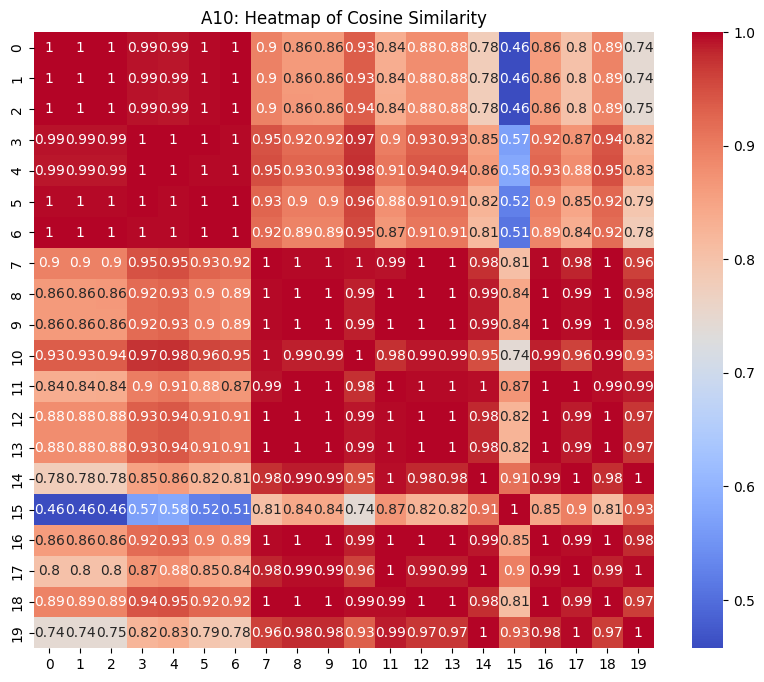

In [50]:
    # A10
plot_heatmap(numeric_thyroid_data)